**Brian Blaylock**  
*August 10, 2022*

# NAM Data

This tutorial shows you how to download NAM data from Amazon (and other sources) with the Herbie Python package.

In [1]:
from herbie.archive import Herbie
from toolbox.cartopy_tools import common_features, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs


🥳 Herbie loaded your custom templates.


In [4]:
H = Herbie("2022-08-10", model="nam", fxx=6, priority='nomads')


✅ Found ┊ model=nam ┊ product=conusnest.hiresf ┊ 2022-Aug-10 00:00 UTC F06 ┊ GRIB2 @ nomads ┊ IDX @ nomads


In [5]:
ds = H.xarray("TMP:2 m above")
ds

<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2022-08-10
    step                 timedelta64[ns] 06:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 21.14 21.14 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2022-08-10T06:00:00
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 295.0 295.0 294.9 ... 290.4 290.4 290.4
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   nam
    product:                 conusnest.hiresf
    description:             North America Mesoscale - CONUS
    remote_grib:             https://nomads.ncep.noaa.gov/pub/data/nccf/com/n...
    local_grib:              /p/cwfs/blaylock/data/nam/20220810/subset_6765c0...
    searchString:            TMP:2 m above

Text(1.0, 1.0, '2 metre temperature')

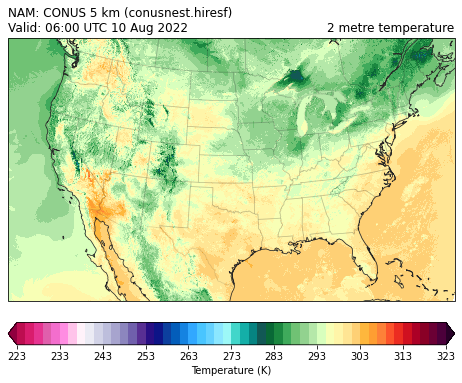

In [7]:
ax = common_features("50m", crs=ds.herbie.crs, figsize=[8, 8]).STATES().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description} ({H.product})\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.t2m.GRIB_name, loc="right")


## Cycle through all products:

In [44]:
def plot_product(product):
    H = Herbie("2022-08-10", model="nam", fxx=6, product=product)

    ds = H.xarray("TMP:2 m above")

    ax = common_features("50m", crs=ds.herbie.crs, figsize=[8, 8]).STATES().ax
    p = ax.pcolormesh(
        ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
    )
    plt.colorbar(
        p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
    )

    ax.set_title(
        f"{ds.model.upper()}: {H.product_description} ({product})\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
        loc="left",
    )
    ax.set_title(ds.t2m.GRIB_name, loc="right")
    return H, ds, ax

In [45]:
H.PRODUCTS.keys()

dict_keys(['conusnest.hiresf', 'firewxnest.hiresf', 'alaskanest.hiresf', 'hawaiinest.hiresf', 'priconest.hiresf', 'afwaca'])

✅ Found ┊ model=nam ┊ product=conusnest.hiresf ┊ 2022-Aug-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


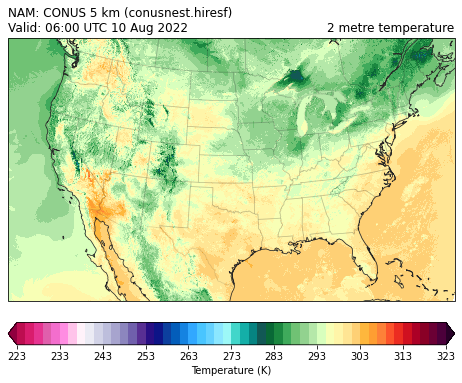

In [21]:
H, ds, ax = plot_product('conusnest.hiresf')

✅ Found ┊ model=nam ┊ product=firewxnest.hiresf ┊ 2022-Aug-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


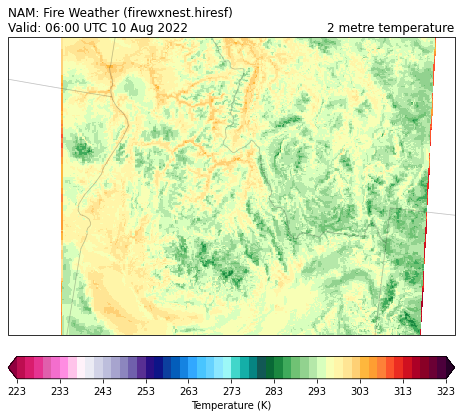

In [22]:
H, ds, ax = plot_product('firewxnest.hiresf')

✅ Found ┊ model=nam ┊ product=alaskanest.hiresf ┊ 2022-Aug-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


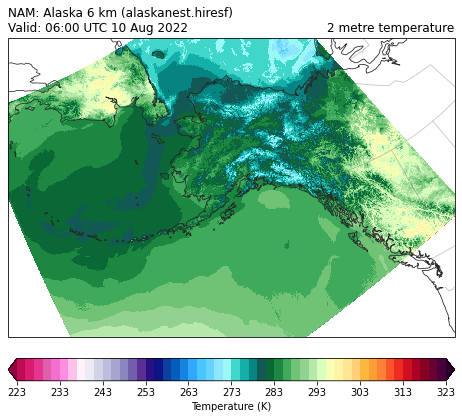

In [25]:
H, ds, ax = plot_product('alaskanest.hiresf')

✅ Found ┊ model=nam ┊ product=hawaiinest.hiresf ┊ 2022-Aug-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


ValueError: not enough values to unpack (expected 2, got 1)

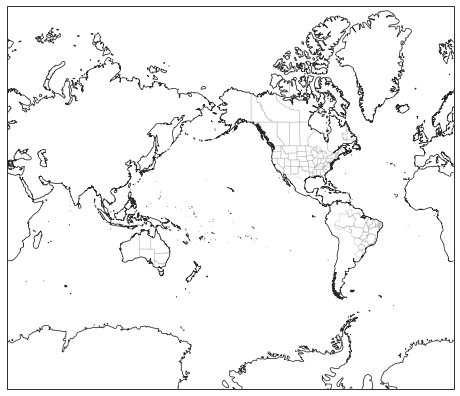

In [27]:
# NOTE: Weirdness with Hawaii not returning as a grid, but as a line
# NOTE: NEEDS TO BE RESHAPED

H, ds, ax = plot_product('hawaiinest.hiresf')

In [29]:
ds = Herbie('2022-08-10', model='nam', product='hawaiinest.hiresf').xarray("TMP:2 m")
ds

✅ Found ┊ model=nam ┊ product=hawaiinest.hiresf ┊ 2022-Aug-10 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


<xarray.Dataset>
Dimensions:              (values: 72225)
Coordinates:
    time                 datetime64[ns] 2022-08-10
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (values) float64 18.07 18.07 18.07 ... 23.09 23.09
    longitude            (values) float64 198.5 198.5 198.5 ... 206.1 206.1
    valid_time           datetime64[ns] 2022-08-10
Dimensions without coordinates: values
Data variables:
    t2m                  (values) float32 299.8 299.8 299.8 ... 299.0 299.0
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   nam
    product:                 hawaiinest.hiresf
    description:             North America Mesoscale - CONUS
    remote_grib:             https://noaa-nam-pds.s3.amazonaws.com/nam.202208...
    local_grib:              /p/cwfs/blaylock/data/nam/20220810/subset_93f271...
    searchString:            TMP:2 m

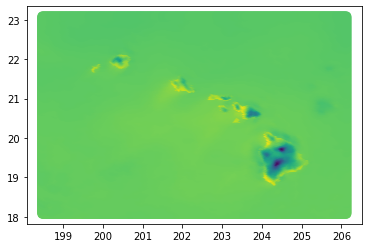

In [35]:
plt.scatter(ds.longitude, ds.latitude, ds.t2m, c=ds.t2m, marker='.')

✅ Found ┊ model=nam ┊ product=priconest.hiresf ┊ 2022-Aug-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


ValueError: not enough values to unpack (expected 2, got 1)

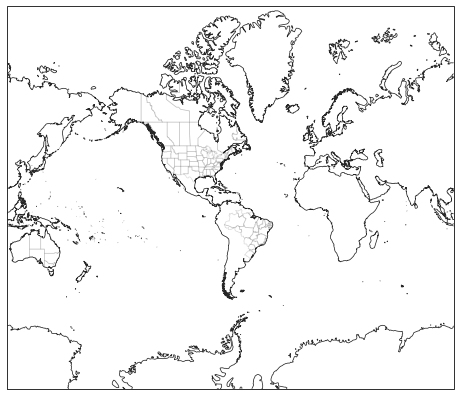

In [46]:
# NOTE: Weirdness with Puerto Rico not returning as a grid, but as a line

H, ds, ax = plot_product('priconest.hiresf')

In [43]:
ds = Herbie('2022-08-10', model='nam', product='priconest.hiresf').xarray("TMP:2 m above")
ds

✅ Found ┊ model=nam ┊ product=priconest.hiresf ┊ 2022-Aug-10 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


<xarray.Dataset>
Dimensions:              (values: 168640)
Coordinates:
    time                 datetime64[ns] 2022-08-10
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (values) float64 15.0 15.0 15.0 ... 22.01 22.01 22.01
    longitude            (values) float64 284.5 284.5 284.5 ... 297.5 297.5
    valid_time           datetime64[ns] 2022-08-10
Dimensions without coordinates: values
Data variables:
    t2m                  (values) float32 nan nan nan nan ... nan nan nan nan
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   nam
    product:                 priconest.hiresf
    description:             North America Mesoscale - CONUS
    remote_grib:             https://noaa-nam-pds.s3.amazonaws.com/nam.202208...
    local_grib:              /p/cwfs/blaylock/data/nam/20220810/subset_93f271...
    searchString:            TMP:2 m above

✅ Found ┊ model=nam ┊ product=afwaca ┊ 2022-Aug-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


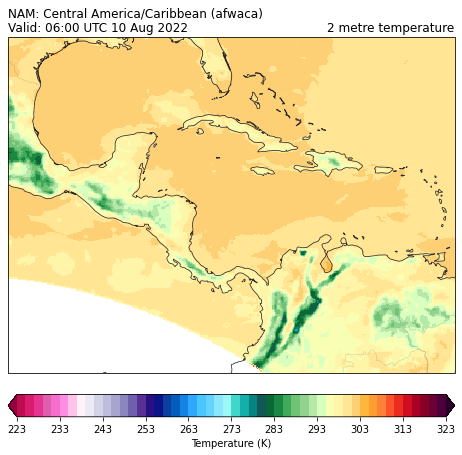

In [47]:
H, ds, ax = plot_product('afwaca')